# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。



In [33]:
import numpy as np

def logistic_hypothesis(X):
    np.random.seed(0)
    theta = np.random.rand(1,X.shape[1])
    hypothesis = 1/(1 + np.exp(-1 * (np.dot(X, theta.T))))
    return hypothesis

In [34]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data[:, 2:][50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

logistic_hypothesis(X)

ones = np.ones((1,1))
theta = np.random.rand(1,X.shape[1])
theta = np.insert(theta, 0, ones).reshape(-1,1)

(logistic_hypothesis(X) - y).shape

X

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


In [36]:
# 問題2
def _gradient_descent(self, X, error, y):
    error = (error - y).reshape(-1,1) # shape(100,1) - shape(100,1)
    sum_error = np.sum(error * X, axis=0) #shape(100,5) * (100,1)をsumで縦方向に計算 (1,5)
    self.theta[0] = self.theta[0] - self.lr*(sum_error[0]/X.shape[0]) 
    for i in range(1, X.shape[1]):
            self.theta[i] = self.theta[i] - self.lr*(sum_error[i]/X.shape[0] + self.lamda*self.theta[i]/X.shape[0]) 

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。




In [37]:

def predict(X):
    pred = logistic_hypothesis(X)
    pred = np.where(pred < 0.5, 0, 1)
    return pred

predict(X_train).ravel()


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:

def predict_proba(X):
    pred_0 = 1- logistic_hypothesis(X)
    pred_1 = logistic_hypothesis(X)
    pred_proba = np.hstack([pred_0, pred_1])
    return pred_proba

predict_proba(X_test)

array([[0.02812838, 0.97187162],
       [0.06685487, 0.93314513],
       [0.01082082, 0.98917918],
       [0.0154009 , 0.9845991 ],
       [0.00601522, 0.99398478],
       [0.01331033, 0.98668967],
       [0.032314  , 0.967686  ],
       [0.03179778, 0.96820222],
       [0.05163972, 0.94836028],
       [0.0490172 , 0.9509828 ],
       [0.01382205, 0.98617795],
       [0.01942372, 0.98057628],
       [0.04142204, 0.95857796],
       [0.01019861, 0.98980139],
       [0.00895434, 0.99104566],
       [0.07403668, 0.92596332],
       [0.01901644, 0.98098356],
       [0.02357465, 0.97642535],
       [0.03407489, 0.96592511],
       [0.00965923, 0.99034077],
       [0.01302954, 0.98697046],
       [0.02812838, 0.97187162],
       [0.04057259, 0.95942741],
       [0.02812838, 0.97187162],
       [0.01435317, 0.98564683]])

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。


In [39]:
def cost_function(X, y,lamda=0.01):
    theta = np.random.rand(1,X.shape[1])
    y = y.reshape(-1,1)
    cross_entropy = (1/X.shape[0]) * np.sum((-y * np.log(logistic_hypothesis(X))) - ((1- y) * np.log(1-logistic_hypothesis(X))))
    regularization_term = lamda/2*X.shape[0] * np.sum(theta**2)
    cost_loss =  (cross_entropy + regularization_term).tolist()
    return cost_loss

cost_function(X_test, y_test)
#(-y * np.log(logistic_hypothesis(X))).shape

1.942317341328838

In [40]:
# 検証用に調べたが、あまり間違っていなさそう。
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris.data[:, 2:][50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LogisticRegression().fit(X_train, y_train)
pred_sklearn = model.predict(X_test)
pred_sklearn

log_loss(y_test, pred_sklearn)

4.14468515128649

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [41]:
# 合体版
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lamda = 0.001
        self.list_train_loss = []
        self.list_val_loss = []
        
    # 問題１    
    def _logistic_hypothesis(self, X):
        z = np.dot(X, self.theta)
        y_hot = 1/(1 + np.exp(-z))
        return y_hot

    # 問題2
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1],1)
        
        # バイアスをthetaとX, X_valに追加
        if self.bias:
            # ブロードキャストで特徴量の先頭に１を追加
            X = np.insert(X, 0, 1, axis=1)
            ones = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, ones) ###########
        
        # 訓練データを勾配計算からpredict〜cost_functionを計算
        for i in range(self.iter):
            error = self._logistic_hypothesis(X) #(75,1) 
            self._gradient_descent(X, error, y)
            #y_pred = self.predict_proba(X)[:,1]
            loss, _ = self.cost_function(X, y, error)
            self.list_train_loss.append(loss)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print("{}/{}, train_loss {}".format(i+1, self.iter, loss))
        

        # テストデータを勾配計算からpredict〜cost_functionを計算
        if X_val is not None and y_val is not None:
            self.val_theta = np.random.rand(X_val.shape[1], 1)
            
            if self.bias:
                X_val = np.insert(X_val, 0, 1, axis=1)
                val_ones = np.ones((1,1))
                self.val_theta = np.insert(self.val_theta, 0, val_ones)
            
            for i in range(self.iter):
                error = self._logistic_hypothesis(X_val) # (25,1)
                self._gradient_descent(X_val, error, y_val)
                #y_val_pred = self.predict_proba(X_val)[:, 1]
                _, val_loss = self.cost_function(X_val, y_val, error)
                self.list_val_loss.append(val_loss)
        
                if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                    print("{}/{}, test_loss {}".format(i+1, self.iter, val_loss))
             
            
    # 問題3
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """ 
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)    
            
        pred = self._logistic_hypothesis(X)
        pred = np.where(pred < 0.5, 0, 1)
        return pred
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._logistic_hypothesis(X)
        return pred_proba
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        error = (error - y).reshape(-1,1) # shape(100,1) - shape(100,1)
        sum_error = np.sum(error * X, axis=0) #shape(100,5) * (100,1)をsumで縦方向に計算 (1,5)
        self.theta[0] = self.theta[0] - self.lr*(sum_error[0]/X.shape[0]) 
        for i in range(1, X.shape[1]):
             self.theta[i] = self.theta[i] - self.lr*(sum_error[i]/X.shape[0] + self.lamda*self.theta[i]/X.shape[0]) 
    
    
    # 問題4
    def cost_function(self, X,y, y_pred):
        y = y.reshape(-1,1)
        cross_entropy = 1/X.shape[0] * np.sum(-y * np.log(y_pred) - (1- y) * np.log(1-y_pred))
        regularization_term = self.lamda * np.sum(self.theta**2) / 2*X.shape[0]
        cost_loss =  cross_entropy + regularization_term
        self.loss = cost_loss
        self.val_loss = cost_loss
        return self.loss, self.val_loss


In [44]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score, confusion_matrix

X = iris.data[:, 2:][50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

model_scratch = ScratchLogisticRegression(1000, 0.001, True, True)
model_scratch.fit(X_train, y_train, X_test, y_test)


1/1000, train_loss 184.8402954883731
2/1000, train_loss 184.4101289996841
3/1000, train_loss 183.98012861491594
4/1000, train_loss 183.55029607550946
5/1000, train_loss 183.12063314027858
6/1000, train_loss 182.6911415855582
7/1000, train_loss 182.26182320535224
8/1000, train_loss 181.83267981148364
9/1000, train_loss 181.40371323374384
10/1000, train_loss 180.97492532004244
11/1000, train_loss 180.54631793655966
12/1000, train_loss 180.11789296789652
13/1000, train_loss 179.6896523172272
14/1000, train_loss 179.26159790645204
15/1000, train_loss 178.8337316763501
16/1000, train_loss 178.4060555867323
17/1000, train_loss 177.97857161659664
18/1000, train_loss 177.55128176428124
19/1000, train_loss 177.12418804761973
20/1000, train_loss 176.69729250409677
21/1000, train_loss 176.2705971910024
22/1000, train_loss 175.84410418558957
23/1000, train_loss 175.4178155852291
24/1000, train_loss 174.99173350756672
25/1000, train_loss 174.56586009067982
26/1000, train_loss 174.14019749323407
27/

40/1000, test_loss 17.895452730824157
41/1000, test_loss 17.892892976340253
42/1000, test_loss 17.89035675668973
43/1000, test_loss 17.88784383403478
44/1000, test_loss 17.885353973102706
45/1000, test_loss 17.88288694115796
46/1000, test_loss 17.880442507974344
47/1000, test_loss 17.878020445807625
48/1000, test_loss 17.87562052936833
49/1000, test_loss 17.873242535794866
50/1000, test_loss 17.870886244626906
51/1000, test_loss 17.868551437779075
52/1000, test_loss 17.866237899514857
53/1000, test_loss 17.863945416420815
54/1000, test_loss 17.86167377738107
55/1000, test_loss 17.85942277355204
56/1000, test_loss 17.85719219833744
57/1000, test_loss 17.854981847363554
58/1000, test_loss 17.852791518454758
59/1000, test_loss 17.85062101160932
60/1000, test_loss 17.848470128975393
61/1000, test_loss 17.84633867482736
62/1000, test_loss 17.844226455542344
63/1000, test_loss 17.842133279577002
64/1000, test_loss 17.84005895744456
65/1000, test_loss 17.838003301692094
66/1000, test_loss 17.

In [45]:
# 評価の確認
pred = model_scratch.predict(X_test)
pred_proba = model_scratch.predict_proba(X_test)

print(pred.ravel())
print(pred_proba)
print("-"*50)
# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

# スクラッチのクロスエントロピー
_, cost = model_scratch.cost_function(X_test, y_test, pred_proba)
print("log loss: {}".format(cost))

[0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1]
[0.48510111 0.57607411 0.4954316  0.55624094 0.59520261 0.56547638
 0.53479391 0.49687176 0.57466659 0.60052449 0.54791799 0.62469687
 0.6060396  0.49495156 0.55197082 0.52305884 0.4954316  0.51417688
 0.49591164 0.48462146 0.55197082 0.44778928 0.54363349 0.55576688
 0.53861386]
--------------------------------------------------
[[ 6  2]
 [ 7 10]]
0.64
0.8333333333333334
0.5882352941176471
0.6896551724137931
log loss: 17.593488327358447


In [51]:
# sklearnのロジスティック回帰と比較する
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris.data[:, 2:][50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

model = LogisticRegression().fit(X_train, y_train)
pred_sk = model.predict(X_test)
pred_sk_proba = model.predict_proba(X_test)[:,1]

# predとprobaの確認
print(pred_sk)
print(pred_sk_proba)

# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred_sk, y_test))
print(accuracy_score(pred_sk, y_test))
print(precision_score(pred_sk, y_test))
print(recall_score(pred_sk, y_test))
print(f1_score(pred_sk, y_test))

# sklearnのクロスエントロピー

log_loss(y_test, pred_sk)

[1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0]
[0.52877735 0.88913456 0.96798053 0.05138881 0.06277319 0.03785298
 0.39727709 0.97402401 0.00547457 0.23847379 0.18528484 0.01489268
 0.55471013 0.58113101 0.96626881 0.22883272 0.48842459 0.55471013
 0.02039217 0.0092844  0.99540772 0.48842459 0.29007187 0.03083935
 0.46237292]
[[13  3]
 [ 1  8]]
0.84
0.7272727272727273
0.8888888888888888
0.7999999999999999


5.526236207082917

# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。


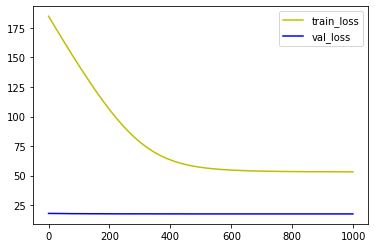

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(1000), model_scratch.list_train_loss, c='y', label='train_loss')  
plt.plot(range(1000), model_scratch.list_val_loss, c='b', label='val_loss')
plt.legend()
plt.show()


# 【問題7】決定領域の可視化
決定領域を可視化してください。


In [53]:
iris = load_iris()
X = pd.DataFrame(iris.data[50:150], columns=iris.feature_names)
y = pd.DataFrame(iris.target[50:150], columns=['target'])
X = X.loc[:, ['petal length (cm)','petal width (cm)']]
df = pd.concat([X,y], axis=1)
df[df['target'] == 1].iloc[:, 0]

iris.feature_names
#sepal length (cm)", "petal width (cm)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(98400, 2)
(240, 410)


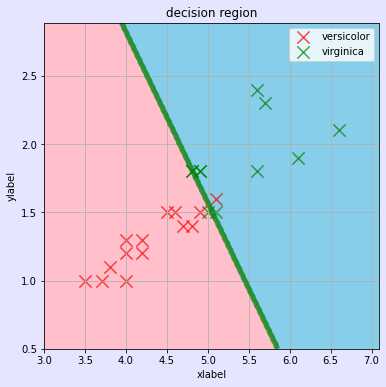

In [62]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the decision area of the model learned by binary classification with two dimensional 
    feature quantity.
     The color of the background is drawn from the estimated value by the learned model.
     The point of the scatter diagram is learning data.

     Parameters
     ------------------
     X_train: ndarray, shape (n_samples, 2)
         Characteristic quantity of learning data
     y_train: ndarray, shape (n_samples,)
         Correct value of learning data
     model: object
         **** Insert Instantus of the learned model
     step: float, (default: 0.1)
         Set interval to calculate estimated value
     title: str
         Give the text of the title of the graph
     xlabel, ylabel: str
         Give sentences of axis labels
     target_names =: list of str
         Give a list of legends
    """
    # define Initial setting 
    fig, ax = plt.subplots(figsize=(6, 6))
    fig.patch.set_facecolor('skyblue')
    fig.patch.set_alpha(1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    # ax.set_yscale('log') 
    plt.grid()
    
    # setting
    scatter_color = ['red', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    print(mesh_f0.shape)
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot setting title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    fig.patch.set_facecolor('blue')
    fig.patch.set_alpha(0.1)
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='g', linewidths=5, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=150, color=scatter_color[i], label=target_names[i], 
                    marker='x', alpha=0.7)
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_test,y_test, model)